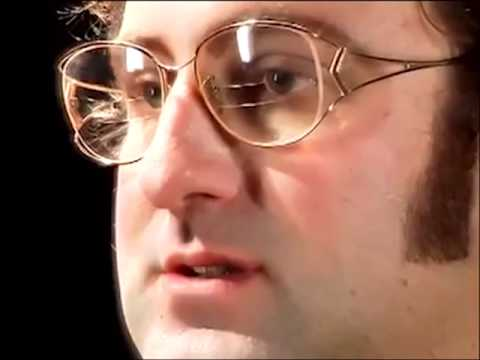

In [1]:
# Scientific libraries
import numpy as np
import scipy.stats as stats
import scipy.special as sf
import scipy.integrate as integrate
import scipy.interpolate as interpolate

# import Pandas



%matplotlib notebook


import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(context='notebook', fscale=1, grid=False)

import popsynth



# Homogenous Spherical Source


## Pareto Luminosity Function

In [11]:
homo_pareto_synth = popsynth.synths.ParetoHomogeneousSphericalPopulation(Lambda=0.25, Lmin=1, alpha=2.)
homo_pareto_synth.display()


## Luminosity Function

<IPython.core.display.Math object>

,parameter,value
0,Lmin,1.0
1,alpha,2.0


## Spatial Function

<IPython.core.display.Math object>

,parameter,value
0,Lambda,0.25


In [12]:
population = homo_pareto_synth.draw_survey(boundary=1E-2, strength=20, flux_sigma= 0.5)

Expecting 1015 total objects


Deteced 173 objects or to a distance of 9.88


In [13]:
population.display()

### ParetoHomogeneousSphericalPopulation simulation
Detected 173 out of 1015 objects

## Luminosity Function

<IPython.core.display.Math object>

,parameter,value
0,Lmin,1.0
1,alpha,2.0


## Spatial Function

<IPython.core.display.Math object>

,parameter,value
0,Lambda,0.25


<IPython.core.display.Javascript object>


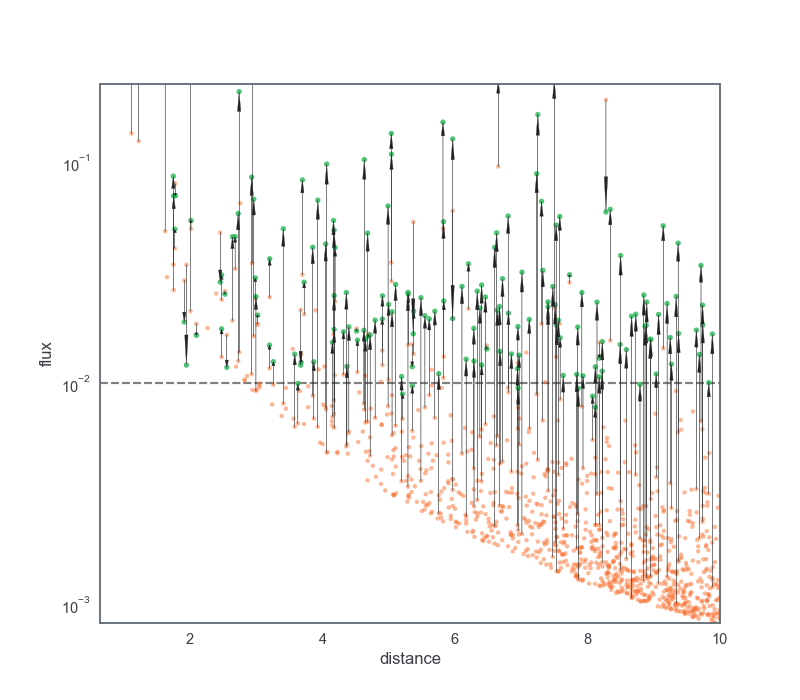

<IPython.core.display.Javascript object>


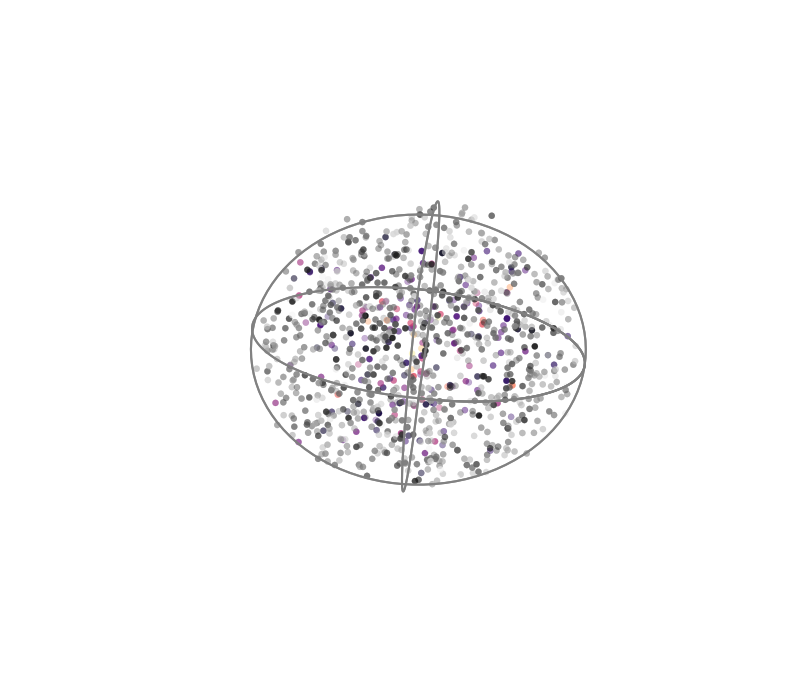

In [14]:
population.display_fluxes()
population.display_flux_sphere()

   ## Schechter Luminosity Function

## Luminosity Function

<IPython.core.display.Math object>

,parameter,value
0,Lmin,1.0
1,alpha,2.0


## Spatial Function

<IPython.core.display.Math object>

,parameter,value
0,Lambda,0.1


Expecting 399 total objects


Deteced 84 objects or to a distance of 9.89


<IPython.core.display.Javascript object>


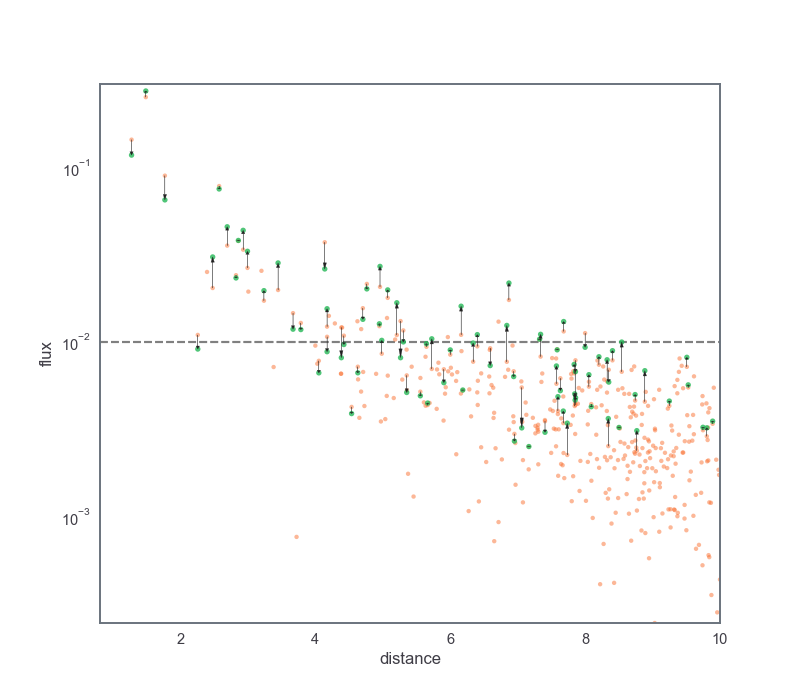

<IPython.core.display.Javascript object>


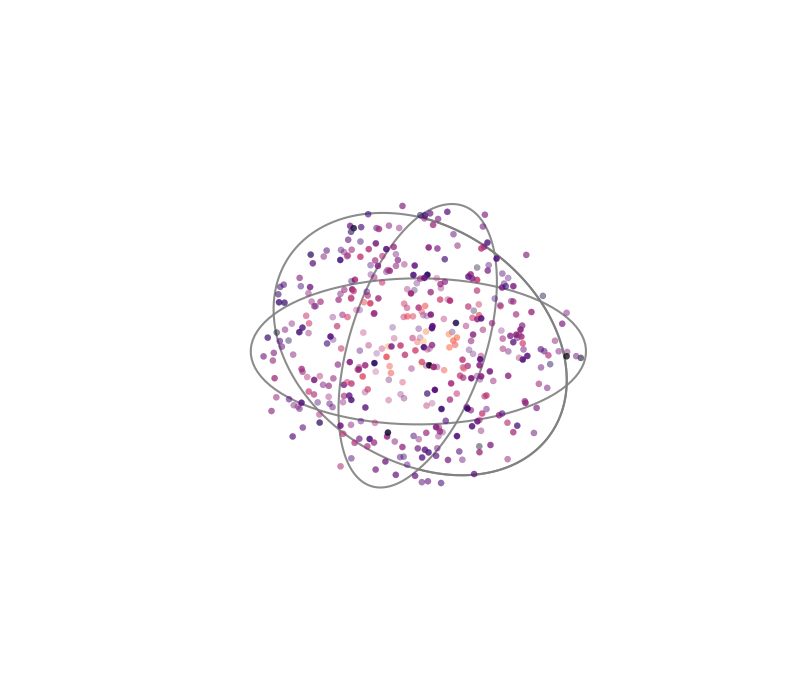

In [16]:
homo_sch_synth = popsynth.synths.SchechterHomogeneousSphericalPopulation(Lambda=0.1, Lmin=1, alpha=2.)
homo_sch_synth.display()
population = homo_sch_synth.draw_survey(boundary=1E-2, strength=5, flux_sigma= 0.1)
population.display_fluxes()
population.display_fluxes_sphere()

# Cosmological Populations

In [17]:
sfr_synth = popsynth.synths.ParetoSFRPopulation(r0=10., rise=.1, decay=2., peak=5., Lmin=1E52, alpha=1.,seed=123)

In [18]:
sfr_synth.display()

## Luminosity Function

<IPython.core.display.Math object>

,parameter,value
0,Lmin,1.000000e+52
1,alpha,1.000000e+00


## Spatial Function

<IPython.core.display.Math object>

,parameter,value
0,r0,10.0
1,rise,0.1
2,decay,2.0
3,peak,5.0


In [19]:
population = sfr_synth.draw_survey(boundary=1E-7,flux_sigma=.1,strength=10)

Expecting 603 total objects


Deteced 474 objects or to a distance of 9.36


<IPython.core.display.Javascript object>


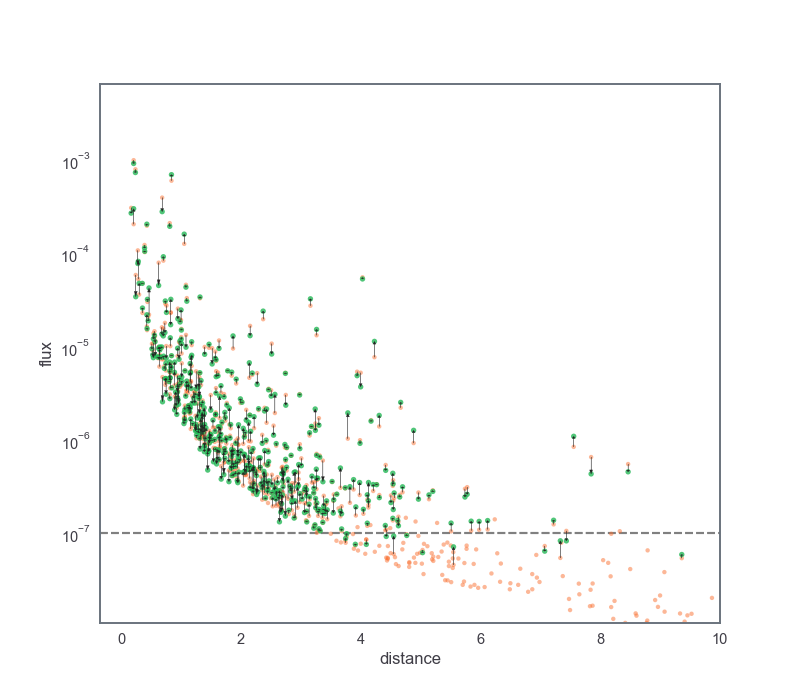

<IPython.core.display.Javascript object>


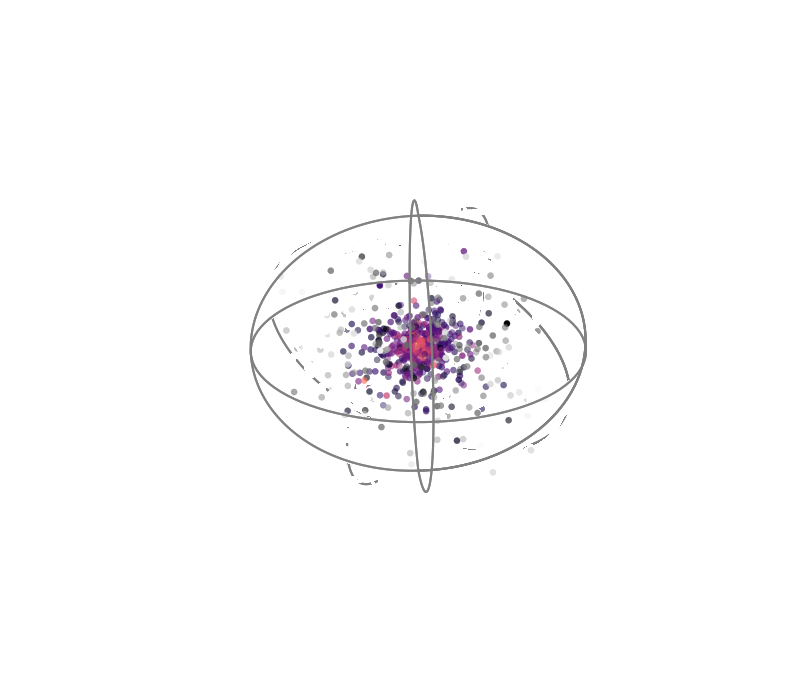

In [20]:
population.display_fluxes()
population.display_flux_sphere()

# Saving the population

In [14]:
population.writeto('saved_pop.h5')

In [3]:
population_reloaded = popsynth.Population.from_file('saved_pop.h5')
population_reloaded.display()

OSError: Unable to open file (unable to open file: name = 'saved_pop.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

# Auxiliary Quantities

In [25]:
sfr_synth = popsynth.synths.ParetoSFRPopulation(r0=10., rise=.1, decay=2., peak=5., Lmin=1E52, alpha=1.,seed=123)

class DemoSampler(popsynth.AuxiliarySampler):
    
    def __init__(self, mu=2, tau=1., sigma=1):
        
        self._mu = mu
        self._tau=tau
        
        super(DemoSampler, self).__init__('demo', sigma)
        
    def true_sampler(self, size):
        
        self._true_values =  np.random.normal(self._mu, self._tau, size=size) - np.log10(1+self._distance)
        
    def observation_sampler(self, size):
        
        self._obs_values =  self._true_values + np.random.normal(0, self._sigma, size=size)


In [26]:
d=DemoSampler(0, 1, .1)

In [27]:
sfr_synth.add_observed_quantity(d)

In [31]:
pop = sfr_synth.draw_survey(boundary=1E-6,flux_sigma=.1)

Expecting 603 total objects


Sampling: demo
Deteced 234 objects or to a distance of 4.67


<IPython.core.display.Javascript object>


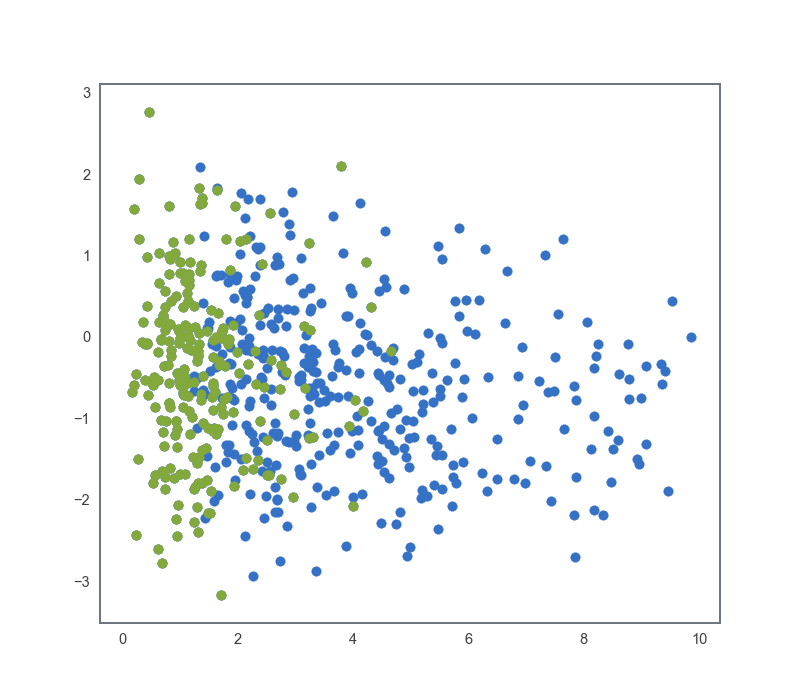

In [32]:
fig, ax = plt.subplots()

ax.scatter(pop.distances,pop.demo_obs)
ax.scatter(pop.selected_distances,pop.demo_selected)

In [7]:
pop.writeto('crap.h5')

In [8]:
pop2 = popsynth.Population.from_file('crap.h5')

<IPython.core.display.Javascript object>


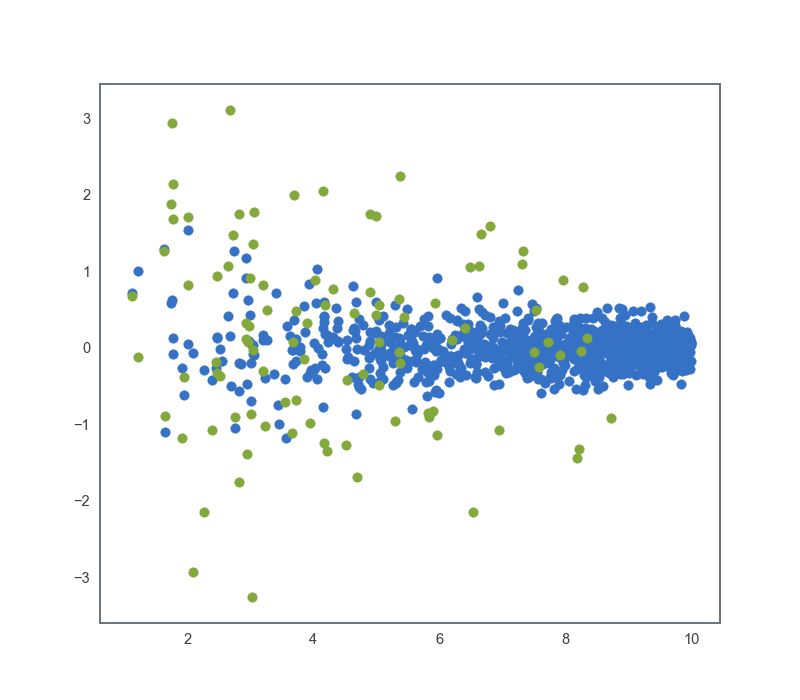

In [9]:
fig, ax = plt.subplots()

ax.scatter(pop2.distances,pop2.demo)
ax.scatter(pop2.selected_distances,pop2.demo_selected)

In [10]:
import h5py

In [11]:
test = h5py.File('crap.h5','r')

In [12]:
test.['']

KeysView(<HDF5 file "crap.h5" (mode r)>)